奇异值分解是一个有着很明显的物理意义的一种方法，它可以将一个比较复杂的矩阵用更小更简单的几个子矩阵的相乘来表示，这些小矩阵描述的是矩阵的重要的特性

#### 普通矩阵分解表达式
$$
A=U \Lambda U^{-1}
$$

In [3]:
import numpy as np

In [6]:
A = np.array([[2, 2]
              ,[1, 2]])
lamda, U = np.linalg.eig(A)

In [11]:
print("lamda:",lamda)
print("特征向量：", U)

lamda: [3.41421356 0.58578644]
特征向量： [[ 0.81649658 -0.81649658]
 [ 0.57735027  0.57735027]]


#### 奇异值分解

In [17]:
A = np.array([[1, 2]
              ,[1, 1]
             ,[0, 0]])
A

array([[1, 2],
       [1, 1],
       [0, 0]])

In [20]:
## AA_T
AA_T = np.dot(A, A.T)
AA_T

array([[5, 3, 0],
       [3, 2, 0],
       [0, 0, 0]])

In [22]:
lamda, U = np.linalg.eig(AA_T)
lamda

array([6.85410197, 0.14589803, 0.        ])

In [23]:
U

array([[ 0.85065081, -0.52573111,  0.        ],
       [ 0.52573111,  0.85065081,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

In [25]:
## A_TA
A_TA = np.dot(A.T, A)
A_TA

array([[2, 3],
       [3, 5]])

In [26]:
lamda, U = np.linalg.eig(A_TA)

In [27]:
lamda

array([0.14589803, 6.85410197])

In [28]:
U

array([[-0.85065081, -0.52573111],
       [ 0.52573111, -0.85065081]])

#### SVD图像图线压缩

In [165]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

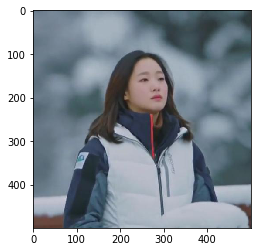

In [167]:
img = mpimg.imread('./imgs/11.jpg')
plt.imshow(img)
plt.savefig("./imgs/123.png")
plt.show()

In [104]:
# 装换为二维数据
img_temp = img.reshape(img.shape[0], img.shape[1]*img.shape[2])

In [105]:
img_temp.shape

(500, 1500)

In [106]:
U, L, V_T = np.linalg.svd(img_temp)

In [107]:
# 左奇异矩阵
U.shape

(500, 500)

In [108]:
#　右奇异矩阵 
V_T.shape

(1500, 1500)

In [109]:
# 奇异值矩阵
L.shape

(500,)

#### 取60个奇异值

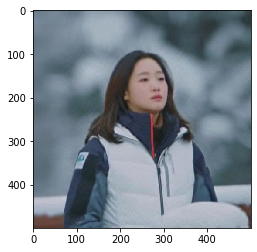

In [111]:
svd_k = 60
img_res = (U[:, 0:svd_k]).dot(np.diag(L[0:svd_k])).dot(V_T[:svd_k, :])
plt.imshow(img_res.reshape(500, 500, 3).astype(np.uint8))
plt.show()

#### 取120个奇异值

In [152]:
svd_k = 100
img_res = (U[:, 0:svd_k]).dot(np.diag(L[0:svd_k])).dot(V_T[:svd_k, :])
# plt.imshow(img_res.reshape(500, 500, 3).astype(np.uint8))
img_res.reshape(500, 500, 3).astype(np.uint8).shape
# plt.show()

(500, 500, 3)

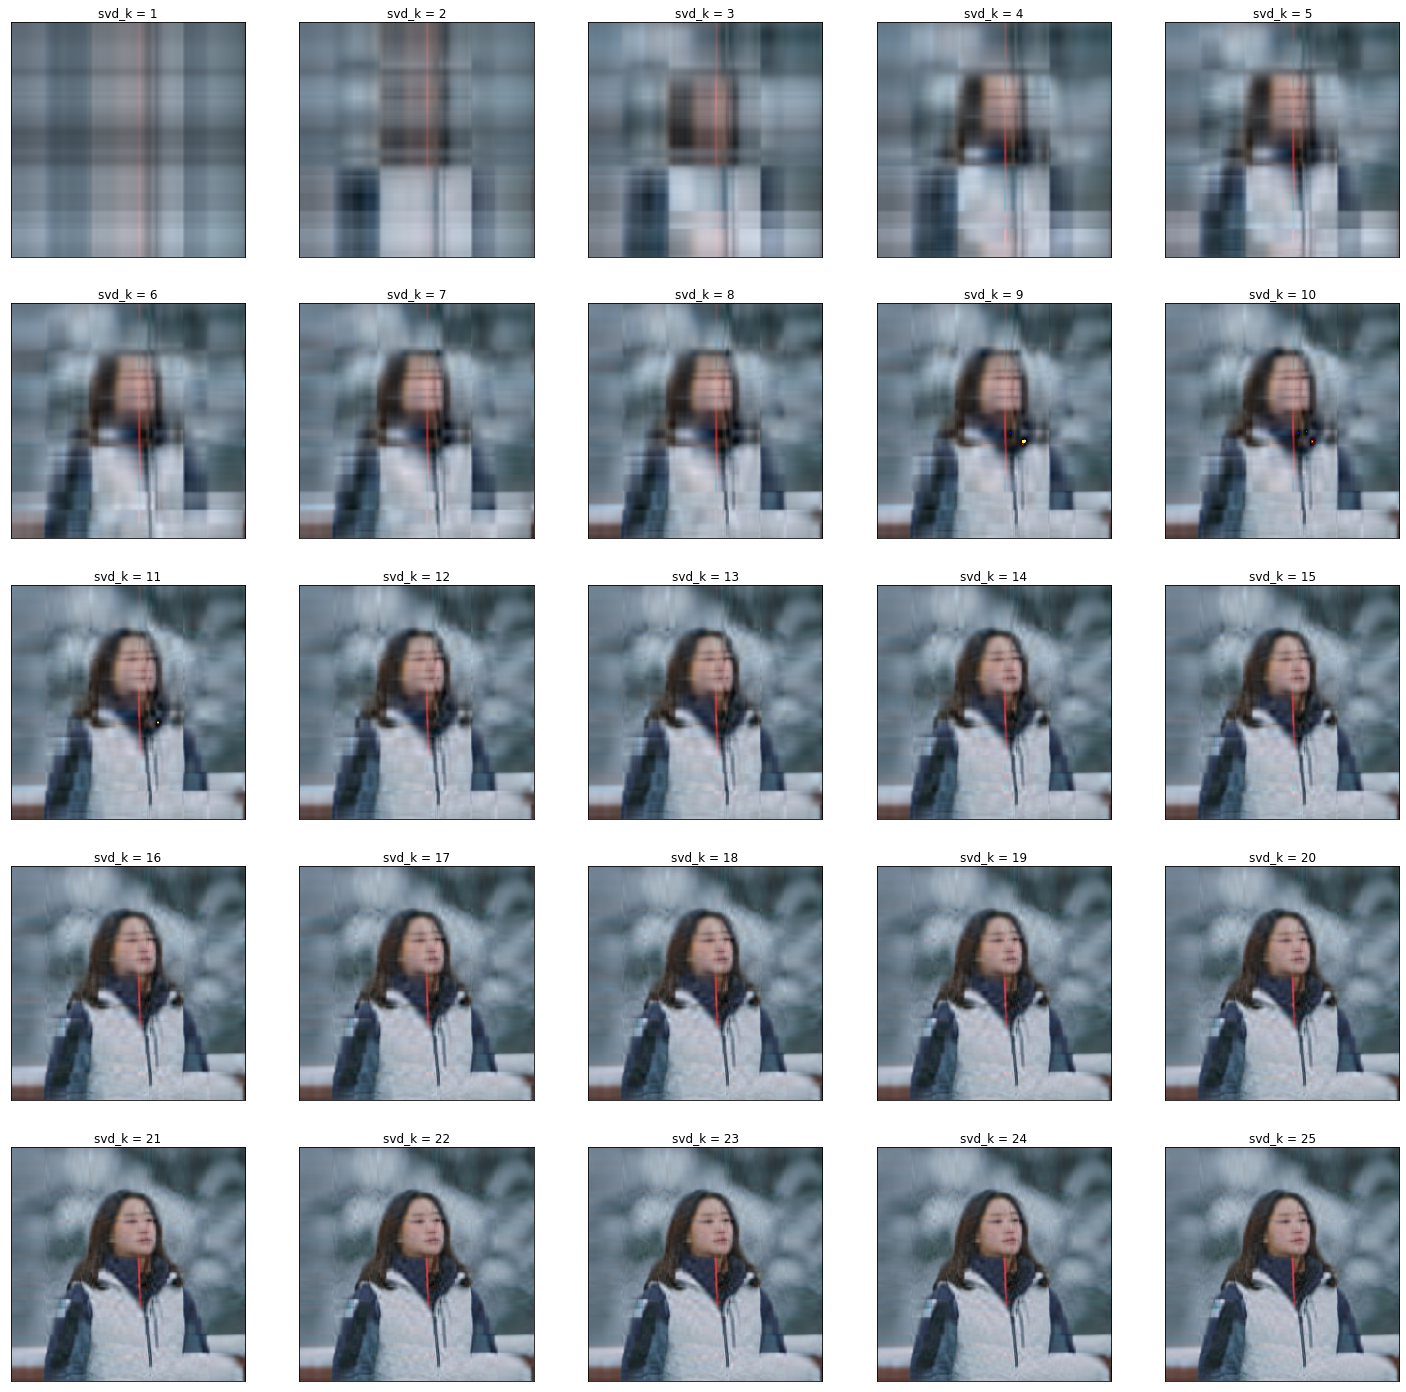

In [170]:
fig, ax = plt.subplots(5
                       ,5
                       , figsize = (25, 25)
                       ,subplot_kw={"yticks": []
                                    , "xticks":[]}
                      )

for i, ax in enumerate((ax.flat)):
    svd_k = i+1
    img_res = (U[:, 0:svd_k]).dot(np.diag(L[0:svd_k])).dot(V_T[:svd_k, :])
    ax.imshow(img_res.reshape(500, 500, 3).astype(np.uint8))
    ax.set(title = "svd_k = {}".format(svd_k))

plt.savefig("./imgs/SVD.png")

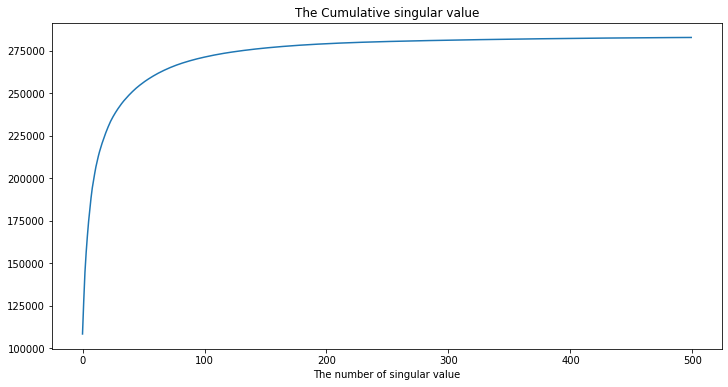

In [171]:
plt.figure(figsize=(12, 6))
plt.plot(range(len(L)), np.cumsum(L))
plt.title("The Cumulative singular value")
plt.xlabel("The number of singular value")
plt.savefig("./imgs/The Cumulative singular value")
plt.show()

**说明：**奇异值下降的速度特别快，在很多情况下前10%甚至1%的奇异值之和就就占全部奇异值之和的99%以上，所以可以用前r个奇异值来近似描述矩阵。

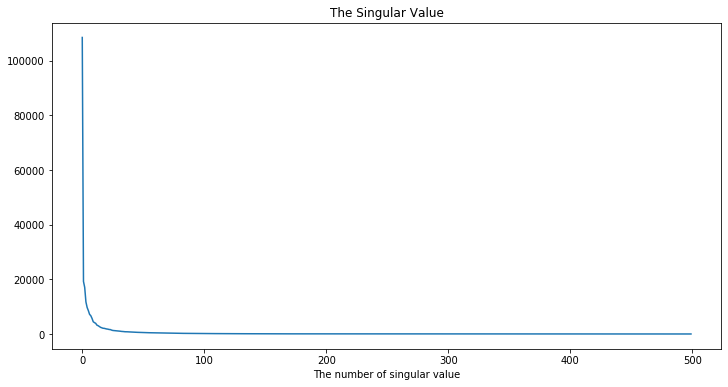

In [172]:
plt.figure(figsize=(12, 6))
plt.plot(range(len(L)), L)
plt.title("The Singular Value")
plt.xlabel("The number of singular value")
plt.savefig("./imgs/The number of singular value")
plt.show()